In [ ]:
"""
!pip install Pillow
"""

In [ ]:
"""
!pip install importnb
import importnb
with __import__('importnb').Notebook():
    from Observe_HessianMatrix import Observe_HessianMatrix
"""

In [ ]:
"""
Cording Plan



Purpose1
固有vector可視化: ndarray [-1, 1]
1step拡散の画像可視化: tensor [-1, 1]




"""

In [1]:
%cd /content/drive/MyDrive/local_repo_all/Research_repo

/content/drive/MyDrive/local_repo_all/Research_repo


In [3]:
"""moduleのパス追加"""
import sys
sys.path.append('/content/drive/MyDrive/local_repo_all/Research_repo/my-submodule')
sys.path.append('/content/drive/MyDrive/local_repo_all/Research_repo/my_modules')

In [4]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import torch
import torchvision

In [ ]:
""" tensor -> PIL image """

In [14]:
tensor_path = '/content/drive/MyDrive/local_repo_all/Research_repo/Data_tobe_loaded/x0_sample.pt'
img_tensor = torch.squeeze(torch.load(tensor_path))


In [12]:
tensor_path = '/content/drive/MyDrive/local_repo_all/Research_repo/obs_he/perx/plural_per100.pth'
img_ten = torch.load(tensor_path, map_location=torch.device('cpu'))
img_tensor = img_ten[0]

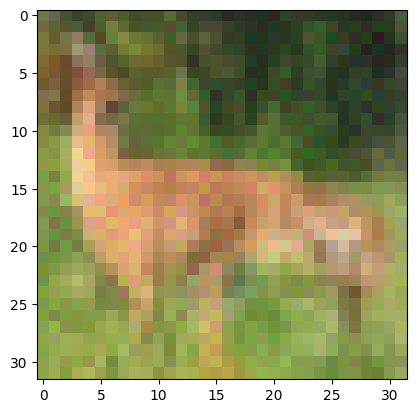

In [15]:
img_pil = torchvision.transforms.functional.to_pil_image(img_tensor)
img_pil.size
plt.imshow(np.array(img_pil))

In [ ]:
"""
x = torch.load('/content/drive/MyDrive/local_repo_all/Research_repo/Data_tobe_loaded/x0_sample.pt')
x = torch.reshape(torch.flatten(x), (-1, 1)).to('cpu').detach().numpy().copy()
"""

In [17]:
B = np.load('/content/drive/MyDrive/local_repo_all/Research_repo/obs_he/Bnew_all/B_100_9.npy')

In [18]:
values, vectors = np.linalg.eig(B)

In [44]:
np.set_printoptions(precision=2, suppress=True)

In [19]:
print(f'{values.shape=}')
print(f'{vectors.shape=}')
print(f'{B.shape=}')

values.shape=(3072,)
vectors.shape=(3072, 3072)
B.shape=(3072, 3072)


In [20]:
# 固有値を昇順でソートし、その順序に合わせて固有ベクトルもソート
sorted_indices = np.argsort(values)
sorted_eigenvalues = values[sorted_indices]
sorted_eigenvectors = vectors[:, sorted_indices]

In [45]:
sorted_eigenvalues

array([-5091.56, -3694.33, -3572.4 , ...,   597.01,  1322.05,  2854.84])

In [63]:
# img = sorted_eigenvectors[:, 0]
img_eigvec0 = sorted_eigenvectors[:, 0]
img_eigvec255 = sorted_eigenvectors[:, 255]
print(f'{img_eigvec0=}\n{img_eigvec255=}')

img_eigvec0=array([-0.  ,  0.01, -0.01, ...,  0.  , -0.01,  0.  ])
img_eigvec255=array([-0.04, -0.  , -0.02, ..., -0.03,  0.01,  0.  ])


In [ ]:
for i in range(255):
  print(f'{sorted_eigenvectors[:, i].max()=}')


In [64]:
img = img_eigvec0
# numpy -> PIL image
n = np.reshape(img, [3, 32, 32])
print(n.shape)
# [C, H, W]から[H, W, C]に順序を変更
p = np.transpose(n, (1, 2, 0))
# 値の範囲を[-1, 1] から[0, 255] にスケーリング
img = (((p+1)/2) * 255).astype(np.uint8)
# PIL Imageに変換
pil_img = Image.fromarray(img)

(3, 32, 32)


In [65]:
print(img)

[[[127 127 129]
  [128 129 124]
  [126 127 128]
  ...
  [126 130 126]
  [125 125 130]
  [127 128 126]]

 [[125 128 128]
  [126 127 127]
  [127 127 128]
  ...
  [131 127 123]
  [127 126 130]
  [129 124 127]]

 [[131 127 122]
  [129 127 126]
  [126 125 130]
  ...
  [129 124 125]
  [120 133 127]
  [127 128 127]]

 ...

 [[123 133 128]
  [129 124 124]
  [131 124 129]
  ...
  [127 125 130]
  [127 129 128]
  [128 123 129]]

 [[128 126 126]
  [129 127 128]
  [124 128 127]
  ...
  [131 124 125]
  [123 129 126]
  [130 127 125]]

 [[125 128 129]
  [126 126 127]
  [130 127 125]
  ...
  [127 128 128]
  [128 128 126]
  [124 128 128]]]


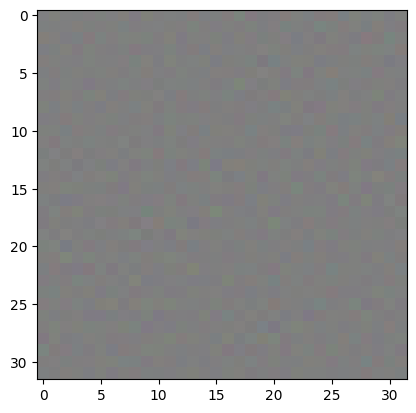

In [66]:
plt.imshow(pil_img)